### something something title

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
#read in data set and check it
cred = pd.read_csv('credit.csv')
cred.head()

,checking,duration,credithistory,purpose,creditamnt,savings,employment,installment,sex,debtors,resident,age,housing,existingcredits,goodbad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,67,A152,2,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,22,A152,1,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,49,A152,1,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,45,A153,1,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,53,A153,2,0


### Question 1 Univariate Analysis

Employement Variable


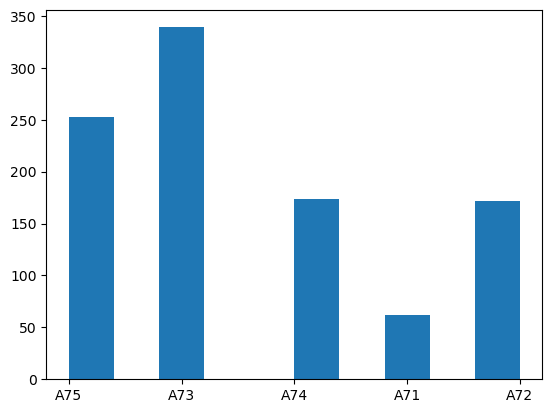

Goodbad Variable


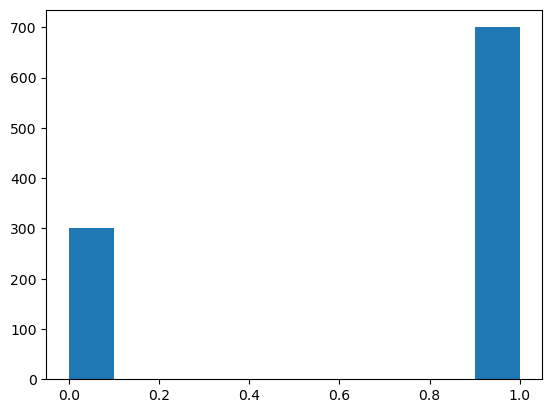

Age Variable


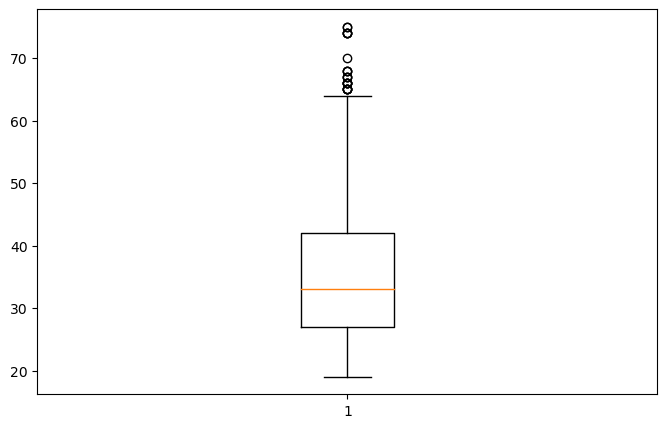

In [3]:
#prelimenary summary of three variables

#variable 1: histograph of the employement variable
print("Employement Variable")
plot.hist(cred['employment'])
plot.show()

#variable 2: of good bad variable DEBUG: change to a bar graph?
print("Goodbad Variable")
plot.hist(cred['goodbad'])
plot.show()

#variable 3: box plot of variable age
print("Age Variable")
figure = plot.figure(figsize = (8, 5))
plot.boxplot(cred['age'])
plot.show()

### Question 2 Biovarate Analysis

In [4]:
#Biavarate Analysis of three selected variables

#Varaible 1: credit history
print("credit history vs. goodbad")
ftable = pd.crosstab(cred['credithistory'], cred['goodbad'])  
ftable

credit history vs. goodbad


goodbad,0,1
credithistory,,
A30,25,15
A31,28,21
A32,169,361
A33,28,60
A34,50,243


In [23]:
#Variable 2: checking
print("checking vs goodbad")

freq_table = pd.crosstab(cred['checking'], cred['goodbad'])

#display the chart
freq_table

checking vs goodbad


goodbad,0,1
checking,,
0,135,139
1,105,164
2,14,49
3,46,348


In [6]:
#Variable 3: purpose
print("purpose vs goodbad")

ftable = pd.crosstab(cred['purpose'], cred['goodbad'])
ftable

purpose vs goodbad


goodbad,0,1
purpose,,
A40,89,145
A41,17,86
A410,5,7
A42,58,123
A43,62,218
A44,4,8
A45,8,14
A46,22,28
A48,1,8


### Question 3 Variable Transformation

In [7]:
#reduce the number of variables in purpose (remember to justify these)

"""
Purpose of loan

A40 : car (new) -->Auto
A41 : car (used) --> Auto
A42 : furniture/equipment --> Home
A43 : radio/television --> Home
A44 : domestic appliances --> Home
A45 : repairs --> other
A46 : education -->learning
A48 : retraining -->learning
A49 : business --> business
A410 : other --> other
"""

#combine the characteristics
cred.replace('A40', 'P1', inplace=True)
cred.replace('A41', 'P1', inplace=True)
cred.replace('A42', 'P2', inplace=True)
cred.replace('A43', 'P2', inplace=True)
cred.replace('A44', 'P2', inplace=True)
cred.replace('A46', 'P3', inplace=True)
cred.replace('A48', 'P3', inplace=True)
cred.replace('A49', 'P4', inplace=True)
cred.replace('A45', 'P5', inplace=True)
cred.replace('A410', 'P5', inplace=True)

#display altered category
cred.head()

,checking,duration,credithistory,purpose,creditamnt,savings,employment,installment,sex,debtors,resident,age,housing,existingcredits,goodbad
0,A11,6,A34,P2,1169,A65,A75,4,A93,A101,4,67,A152,2,1
1,A12,48,A32,P2,5951,A61,A73,2,A92,A101,2,22,A152,1,0
2,A14,12,A34,P3,2096,A61,A74,2,A93,A101,3,49,A152,1,1
3,A11,42,A32,P2,7882,A61,A74,2,A93,A103,4,45,A153,1,1
4,A11,24,A33,P1,4870,A61,A73,3,A93,A101,4,53,A153,2,0


In [8]:
#encode data so the datatype for entries are consistent for prepping purposes

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
cred['checking'] = encoder.fit_transform(cred['checking'])
cred['credithistory'] = encoder.fit_transform(cred['credithistory'])
cred['purpose'] = encoder.fit_transform(cred['purpose'])
cred['savings'] = encoder.fit_transform(cred['savings'])
cred['employment'] = encoder.fit_transform(cred['employment'])
cred['sex'] = encoder.fit_transform(cred['sex'])
cred['debtors'] = encoder.fit_transform(cred['debtors'])
cred['housing'] = encoder.fit_transform(cred['housing'])

#drop unneeded variables???

#check the data
cred.head()

,checking,duration,credithistory,purpose,creditamnt,savings,employment,installment,sex,debtors,resident,age,housing,existingcredits,goodbad
0,0,6,4,1,1169,4,4,4,2,0,4,67,1,2,1
1,1,48,2,1,5951,0,2,2,1,0,2,22,1,1,0
2,3,12,4,2,2096,0,3,2,2,0,3,49,1,1,1
3,0,42,2,1,7882,0,3,2,2,2,4,45,2,1,1
4,0,24,3,0,4870,0,2,3,2,0,4,53,2,2,0


In [9]:
#prep data for following questions

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

#normalize the data
x = cred.drop('goodbad', axis = 1)
y = cred["goodbad"]

#split into training and testing
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.3, random_state = 1000)

#check the data
trainx.shape, trainy.shape, testx.shape, testy.shape

((700, 14), (700,), (300, 14), (300,))

### Question 4 Logistic Regression

In [10]:
#create a binary classification model using logistic regression

#imports
from sklearn.feature_selection import SelectFromModel

from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression

dropped = VarianceThreshold()
dropped = dropped.fit_transform(cred)

#change back to a pandas dataframe
#droppedDF = pd.DataFrame(dropped)

#instansiate logreg
logreg = LogisticRegression(max_iter = 1000)

#feature selection
dfTrim = SelectFromModel(logreg, threshold = 'median')
xTrim = dfTrim.fit_transform(x, y)

xTrim = pd.DataFrame(xTrim)

xTrim.head()

trainx, testx, trainy, testy = train_test_split(xTrim, y, test_size=0.3, random_state = 1000)
fit = logreg.fit(xTrim, y)

In [11]:
x.head()

,checking,duration,credithistory,purpose,creditamnt,savings,employment,installment,sex,debtors,resident,age,housing,existingcredits
0,0,6,4,1,1169,4,4,4,2,0,4,67,1,2
1,1,48,2,1,5951,0,2,2,1,0,2,22,1,1
2,3,12,4,2,2096,0,3,2,2,0,3,49,1,1
3,0,42,2,1,7882,0,3,2,2,2,4,45,2,1
4,0,24,3,0,4870,0,2,3,2,0,4,53,2,2


In [12]:
#place holder values
threshold = 0.0
accuracy = 0.0

local_cutoff = 0.0
#iterate through to find the optimal cutoff
for i in range(1, 100, 1):
    
    cutoff = i/100
    
    prob = (logreg.predict_proba(trainx)[:,1] >= cutoff).astype(int)
    
    local_cutoff = np.sum(trainy == prob)/700
    
    if local_cutoff > accuracy:
        threshold = cutoff
        accuracy = local_cutoff
        
print("Default Accuracy: ", fit.score(trainx, trainy))
print("Best Threshold Found: ", threshold)
print("Accuracy of Best Cutoff: ", accuracy)

Default Accuracy:  0.74
Best Threshold Found:  0.54
Accuracy of Best Cutoff:  0.7557142857142857


In [13]:
#test model on testing data with the best threshold
test_prob = (logreg.predict_proba(testx)[:,1] >= threshold).astype(int)

print("Default accuracy on testing: ", fit.score(testx, testy))
print('Accuracy on testing with custom threshold: {:.3f}'.format(np.sum(testy == test_prob)/300))

Default accuracy on testing:  0.75
Accuracy on testing with custom threshold: 0.763


### Question 5 Decision Tree

In [20]:
#create a second classification model using decision tree
from sklearn import tree

tree = tree.DecisionTreeClassifier(min_samples_leaf = 12, max_depth = 6)
dtfit = tree.fit(trainx, trainy)

print("accuracy ratings")
print("training: ", dtfit.score(trainx, trainy))
print("testing: ", dtfit.score(testx, testy))

accuracy ratings
training:  0.7614285714285715
testing:  0.7566666666666667


In [15]:
#predict accuracy rate
print("Predicted accuracy:")
np.mean(dtfit.predict(testx) == testy)

Predicted accuracy:


0.7166666666666667

In [16]:
#predicted labels
print("Predicted labels:")
dtfit.predict(testx)

Predicted labels:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [17]:
# actual labels
testy

967    1
713    1
222    1
321    0
898    1
      ..
763    0
758    1
496    0
398    0
624    0
Name: goodbad, Length: 300, dtype: int64

In [18]:
#checking if the prediction was correct
dtfit.predict(testx) == testy

967     True
713     True
222     True
321    False
898     True
       ...  
763    False
758     True
496    False
398    False
624    False
Name: goodbad, Length: 300, dtype: bool

In [19]:
#display the results with graphviz
treefit_graph = dtfit.export_graphviz(treefit, out_file = None, 
            feature_names = ['checking', 'duration', 'credithistory', 'purpose', 'creditamnt', 'savings', 'employment', 'installment', 'sex', 'debtors', 'resident', 'age', 'housing', 'existingcredits'],
            class_names = ['good', 'bad']  ,                        
            filled = True, rounded = True,  
            special_characters = True)  

graph = graphviz.Source(treefit_graph)
##FIXME

AttributeError: 'DecisionTreeClassifier' object has no attribute 'export_graphviz'

### Question 6 Model 3

In [65]:
#create a third classification model using a method of my choice: Random Forest??

#imports for drawing and generating random forests
from sklearn import ensemble
from sklearn import tree
import graphviz

#create the random forest
goodbad1 = ensemble.RandomForestClassifier(n_estimators = 6, max_depth = 5, random_state = 1000)
goodbad1 = goodbad1.fit(trainx, trainy)

goodbad1.estimators_
print(len(goodbad1.estimators_))

6


In [66]:
print("Accuracy Results:")
print("Test results", np.mean(goodbad1.predict(testx) == testy))
print("Training results", np.mean(goodbad1.predict(trainx) == trainy))

Accuracy Results:
Test results 0.75
Training results 0.77


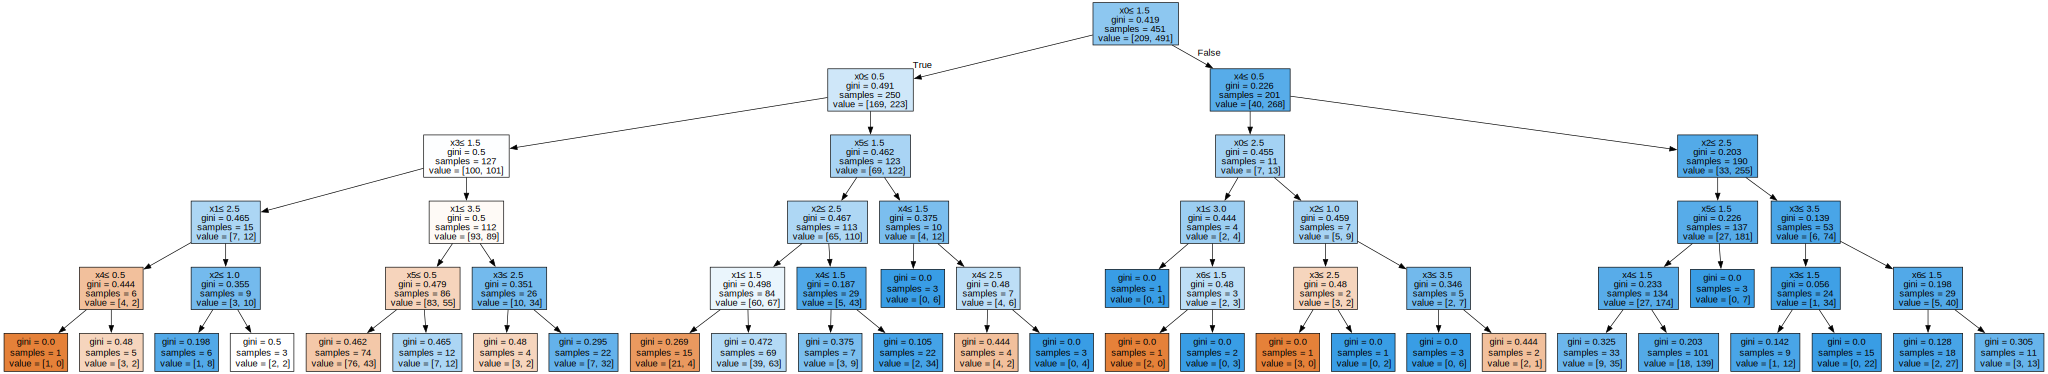

In [67]:
#display the Random Forest tree with graphviz
graph = tree.export_graphviz(goodbad1.estimators_[0], out_file = None, filled = True, 
                             rounded = False, special_characters = True)
graph_display = graphviz.Source(graph)

graph_display